## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

$$\bigg(7\frac{x^4}{4}-8\frac{x^3}{3}-3\frac{x^2}{2}+3x \bigg) \bigg|_{-1}^{1}=\frac{2}{3}$$

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [245]:
import numpy as np

def midpoint_rule(func, a, b, eps):

    I_0 = np.inf
    I = 0
    N = 1
    
    while (np.abs(I - I_0) >= eps):
        dx = (b - a) / N
        points = np.arange(a + dx / 2, b, dx)
        I_0 = I
        I = dx * np.sum([func(i) for i in points])
        N *= 2
        
    return (I, N / 2)

func = lambda x: 7*x**3-8*x**2-3*x+3

print(midpoint_rule(func, -1, 1, 1e-10))

(0.6666666666860692, 524288.0)


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [246]:
from scipy import special

for N in range(1, 7):
    x_n, w_n = special.roots_legendre(N)
    I = 0
    for i in range (len(x_n)):
        I += w_n[i] * func(x_n[i])
    print(I, N)

6.0 1
0.6666666666666674 2
0.6666666666666639 3
0.6666666666666667 4
0.6666666666666685 5
0.6666666666666695 6


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

Уже вторая итерация дает точность лучше требуемой

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

Афинное преобразование:
$$\int_{a}^{b} f(x) dx = \frac{b-a}{2}\int_{-1}^{1} f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right) dx$$

$$\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = 5\int_{-1}^{1} \left(7(5x + 5)^3 - 8(5x + 5)^2 - 3(5x + 5) + 3\right) dx = $$

$$=5\int_{-1}^{1} \left(7\cdot125(x + 1)^3 - 8\cdot25(x + 1)^2 - 3\cdot5(x + 1) + 3\right) dx = 5\int_{-1}^{1} \left(875(x + 1)^3 - 200(x + 1)^2 - 15(x + 1) + 3\right) dx = \frac{44140}{3}=$$
$$=14713\frac{1}{3}$$


In [247]:
func = lambda x: 875*(x+1)**3-200*(x+1)**2-15*(x+1)+3

for N in range(1, 7):
    x_n, w_n = special.roots_legendre(N)
    I = 0
    for i in range (len(x_n)):
        I += w_n[i] * func(x_n[i])
    print(5*I, N)

6630.0 1
14713.333333333332 2
14713.333333333336 3
14713.33333333333 4
14713.333333333328 5
14713.33333333333 6


Сравните результат с точным значением интеграла.

На второй итерации отличия начинаются после 12-го знака после запятой -- точность достаточная

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Замена: $x=2\pi t$
$$
\int_{0}^{1} \frac{cos(2\pi t) dt }{\sqrt{1 - t^2}}=\frac{1}{2}\int_{-1}^{1} \frac{cos(2\pi t) dt }{\sqrt{1 - t^2}},$$
где
$$\omega(x)=\frac{1}{\sqrt{1-t^2}}$$

In [248]:
func = lambda x: np.cos(2*np.pi*x) / 2 

I_0 = np.inf
I = 0
N = 1

while (abs(I - I_0) != 0):
    x_n, w_n = special.roots_chebyt(N)
    I_0 = I
    I = sum(w_n * func(x_n))
    N += 1
    
print(I, N)

0.3460101588122643 32


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

N = 1 , разность:  0.3633802276324186


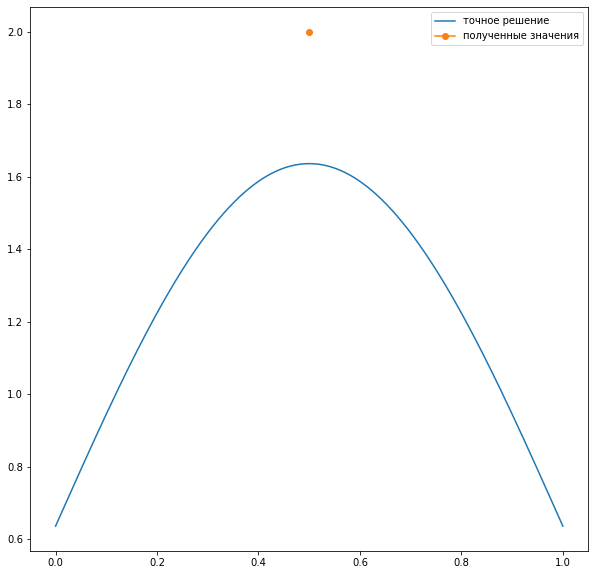

N = 2 , разность:  0.028891342059742083


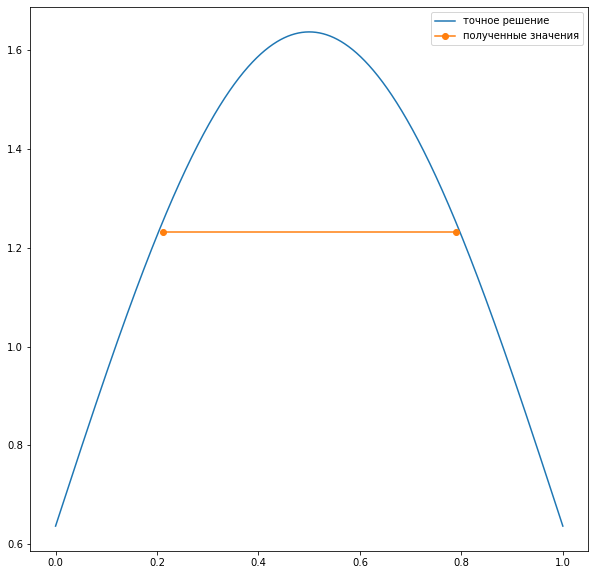

N = 3 , разность:  0.0007657482051929123


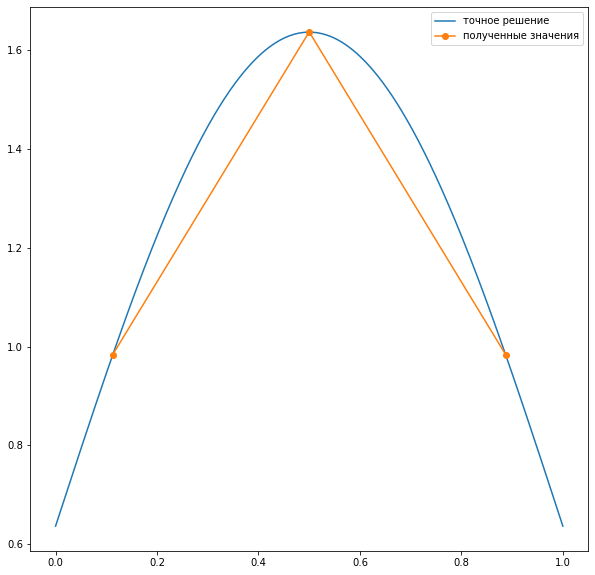

N = 4 , разность:  1.0040475654726766e-05


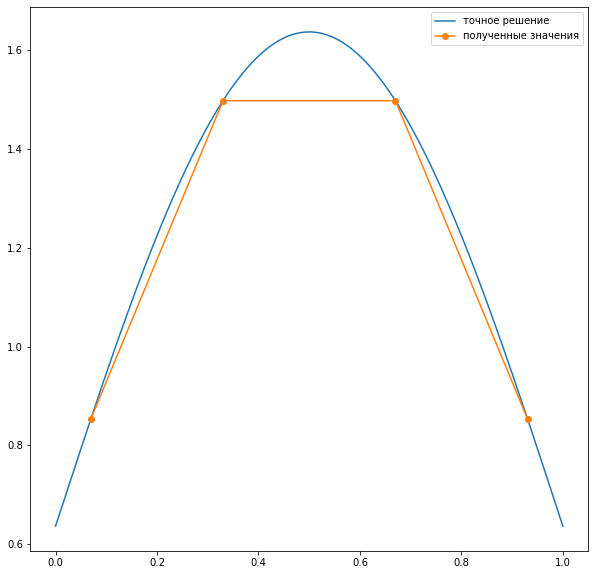

N = 5 , разность:  7.849635638918247e-08


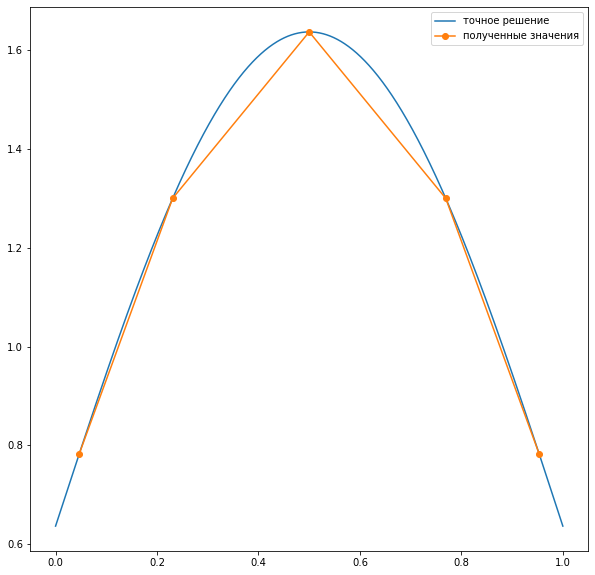

N = 6 , разность:  4.0756981400482947e-10


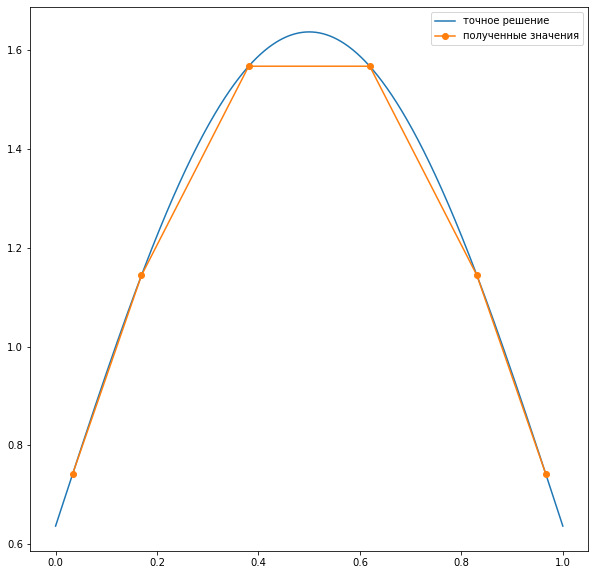

N = 7 , разность:  1.5067470097014853e-12


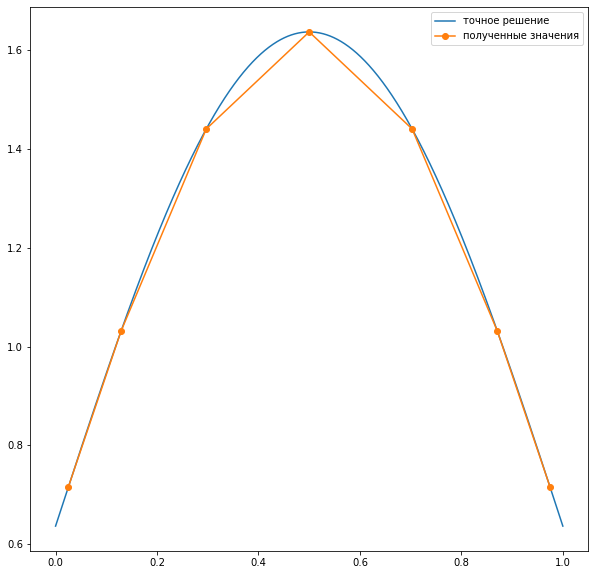

N = 8 , разность:  3.076740298213702e-15


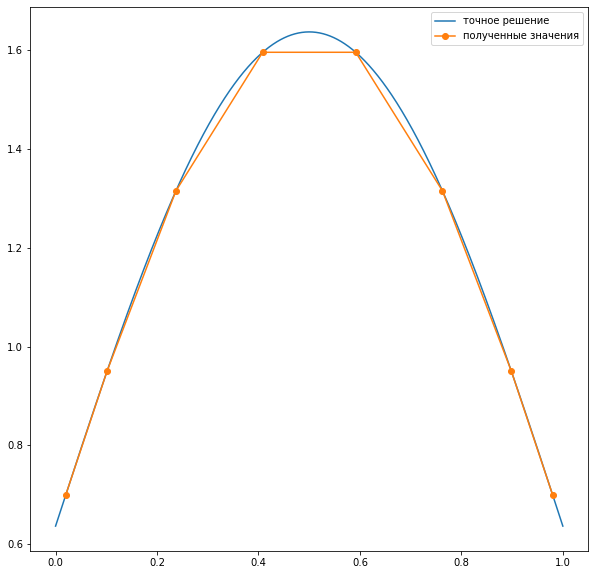

N = 9 , разность:  4.440892098500626e-16


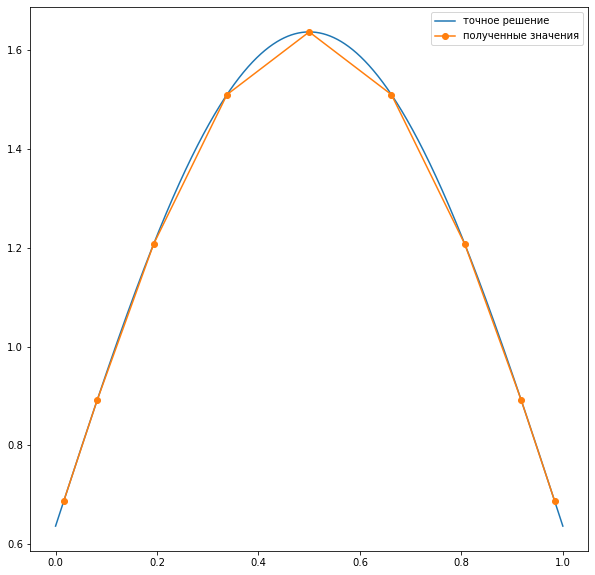

N = 10 , разность:  2.7217452008024307e-15


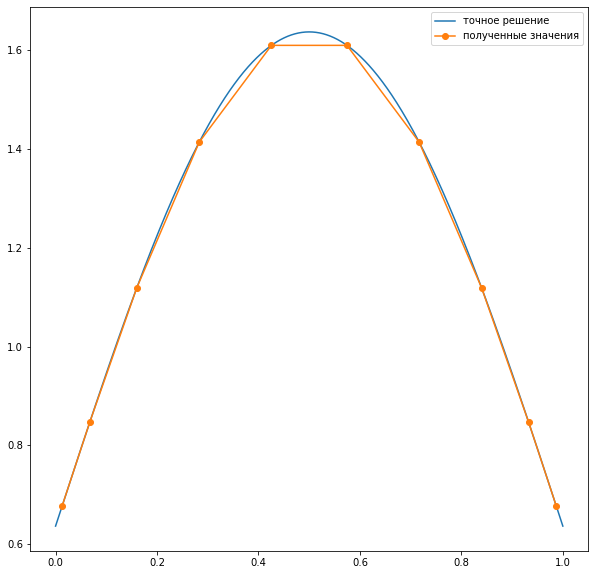

N = 11 , разность:  3.510833468576701e-16


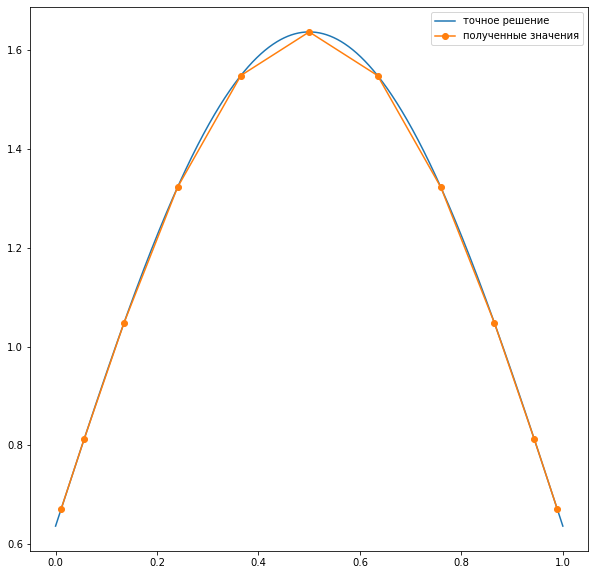

N = 12 , разность:  1.903635937714726e-15


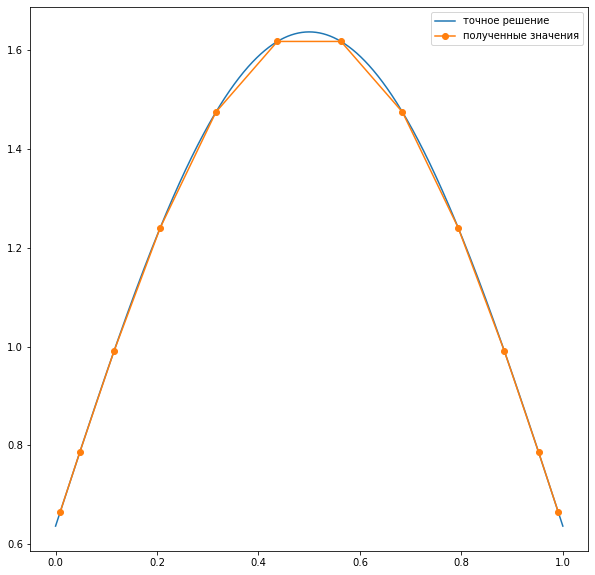

N = 13 , разность:  1.2899625854847774e-15


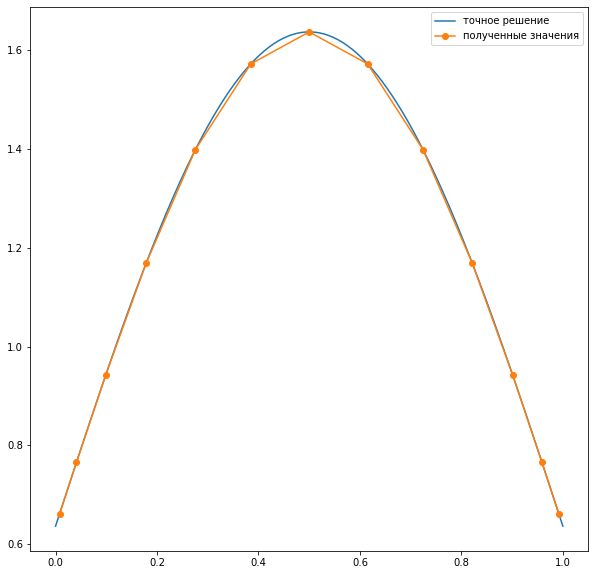

N = 14 , разность:  7.28021923224409e-16


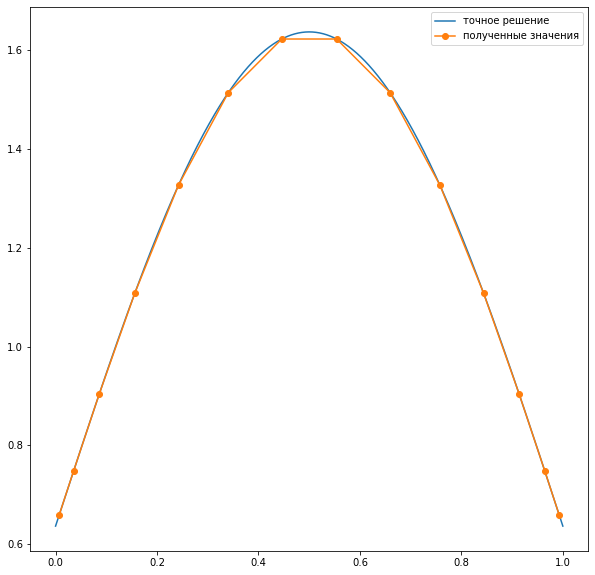

N = 15 , разность:  6.753223014464259e-16


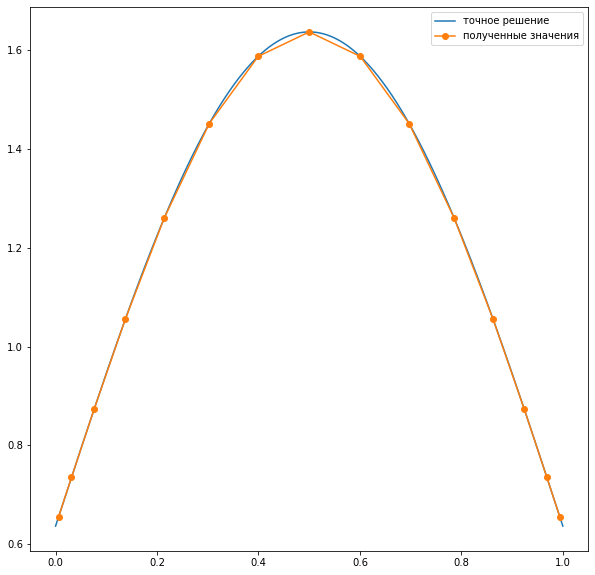

N = 16 , разность:  5.87369889011815e-15


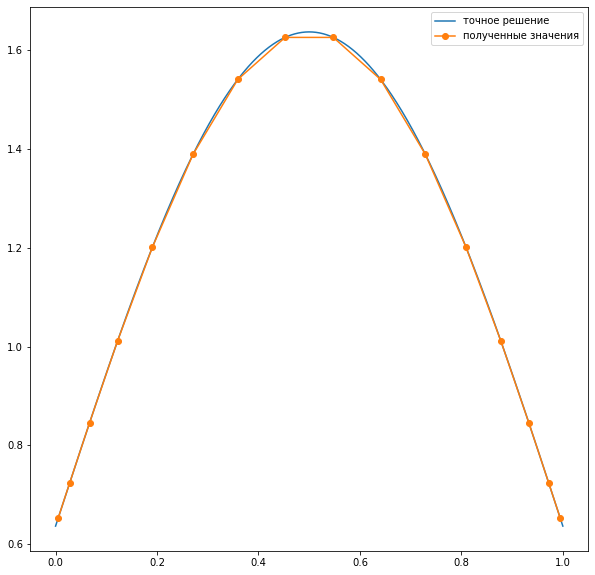

N = 17 , разность:  3.688882027804963e-15


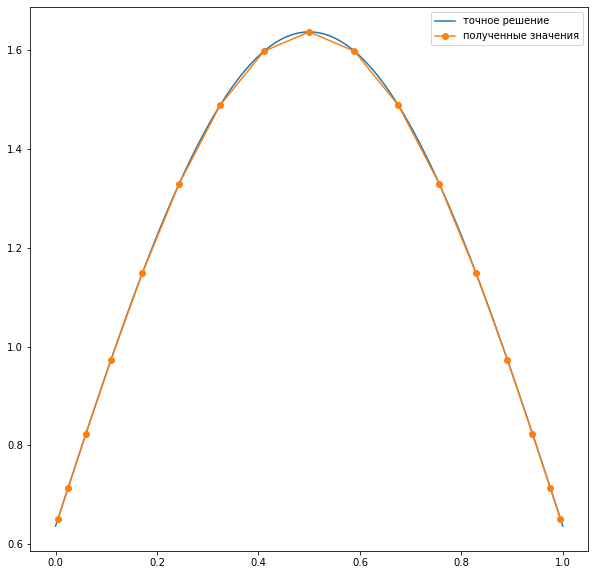

N = 18 , разность:  1.5222611172485232e-15


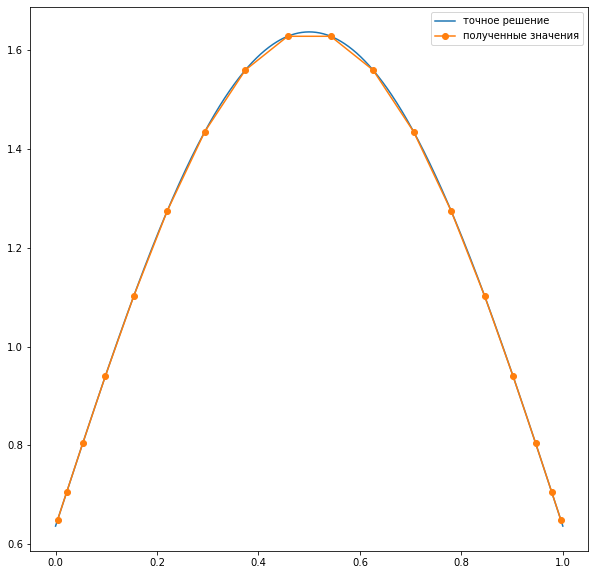

N = 19 , разность:  6.497413668604471e-15


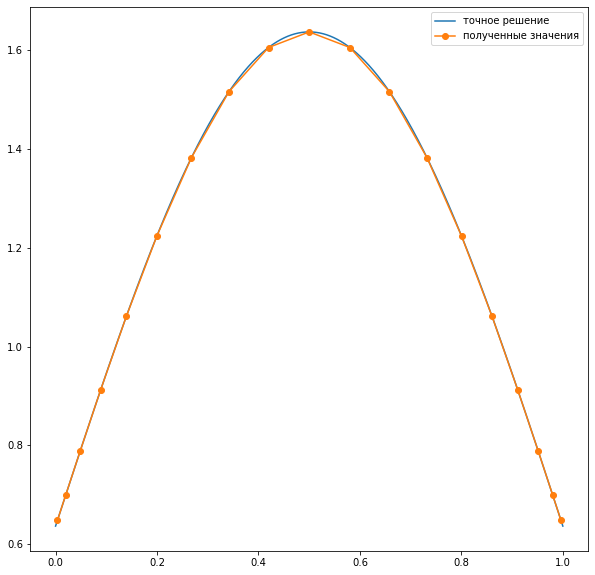

In [249]:
for n in range(1, 20):
    x_n, w_n = special.roots_sh_legendre(n)
    f_n = np.linalg.solve(np.eye(n) - 1/2 * w_n, np.sin(x_n * np.pi))
    print('N =', n, ', разность: ', np.linalg.norm(f_n-np.sin(np.pi * x_n)-2/np.pi))
    
    x = np.linspace(0.0, 1.0, 10 ** 3)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x, np.sin(np.pi * x) + 2/np.pi, label='точное решение')
    plt.plot(x_n, f_n, "o-", label='полученные значения')
    plt.legend()
    plt.show()

Начиная с N = 9, разность перестаёт уменьшаться, поэтому можем остановиться на нём.

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

Разность:  0.10740910929111876
Разность:  0.015020993494533117
Разность:  0.004032363304827658
Разность:  0.001577766772477359
Разность:  0.0008777145390341681
Разность:  0.0005415144109092119
Разность:  0.0003548472172568596
Разность:  0.00024286824672579548
Разность:  0.00017205631506267017
Разность:  0.00012537495944930444
Разность:  9.356571730352343e-05
Разность:  7.123799310680616e-05
Разность:  5.5269156292331374e-05
Разность:  4.352265595248512e-05
Разность:  3.469623549742605e-05
Разность:  2.8013709133500873e-05


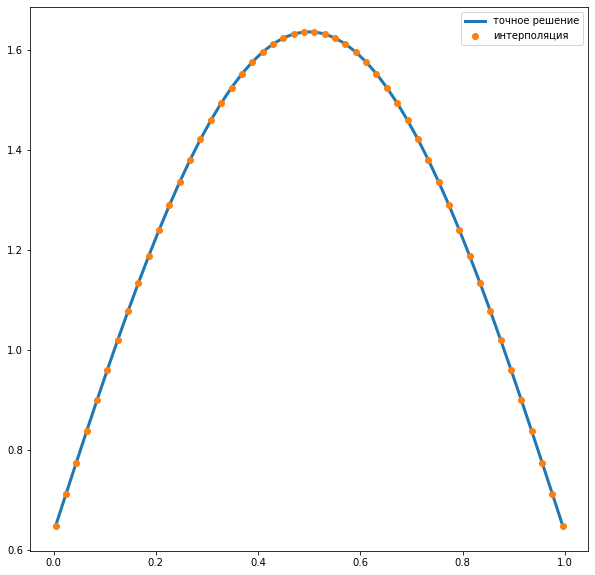

In [250]:
from scipy.interpolate import interp1d

for i in range (4, 20):
    x_n, w_n = special.roots_sh_legendre(i)
    f_n = np.linalg.solve(np.eye(i) - 1/2 * w_n, np.sin(x_n * np.pi))
    f_interp = interp1d(x_n, f_n, kind = 'cubic')

    x = np.linspace(min(x_n), max(x_n), 50)
    
    print('Разность: ', np.linalg.norm(f_interp(x)-np.sin(np.pi * x)-2/np.pi))
    
plt.figure(figsize=(10, 10))
plt.plot(x, np.sin(np.pi * x) + 2/np.pi, linewidth = 3, label='точное решение')
plt.plot(x, f_interp(x), "o", label='интерполяция')
plt.legend()
plt.show()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

3.549844210878242e-05
2.482272739943142e-07
1.1765527091459279e-09
4.027255803522411e-12
7.85124730039983e-15
9.742167503148516e-16
5.5544447935980075e-15
8.3820000221454525e-16
3.956508383408211e-15
2.455074409046352e-15
1.7377739072730912e-15
1.6088660122137097e-15
1.0185048308013224e-14
6.386436720915281e-15
1.683736582170148e-15
1.026160829964587e-14


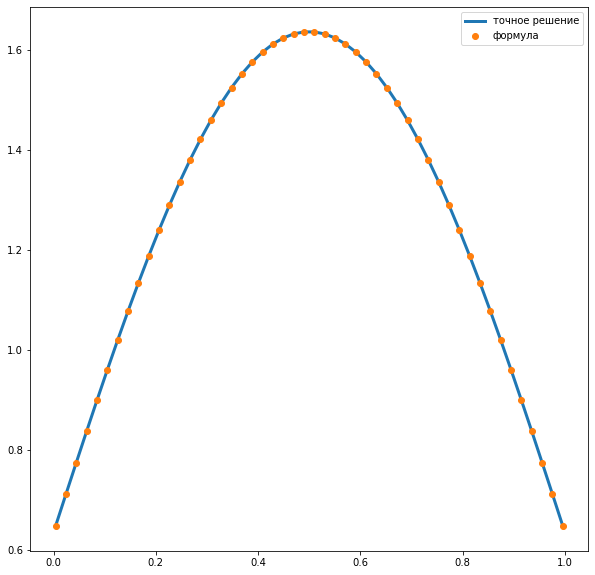

In [251]:
func = lambda x: np.sin(np.pi * x) + 0.5 * (w_n @ f_n)

x = np.linspace(min(x_n), max(x_n), 50)

for i in range (4, 20):
    x_n, w_n = special.roots_sh_legendre(i)
    f_n = np.linalg.solve(np.eye(i) - 1/2 * w_n, np.sin(x_n * np.pi))
    f_interp = interp1d(x_n, f_n, kind = 'cubic')
    
    x = np.linspace(min(x_n), max(x_n), 50)
    
    print(np.linalg.norm(func(x)-np.sin(np.pi * x)-2/np.pi))
    
plt.figure(figsize=(10, 10))
plt.plot(x, np.sin(np.pi * x) + 2/np.pi, linewidth = 3, label='точное решение')
plt.plot(x, func(x), "o", label='формула')
plt.legend()
plt.show()

Видим, что в случае использования формулы ошибка уменьшается быстрее